In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('fsp_case_31_BSD.csv', index_col=0,header=[0 ,1]) 
simp_return = df['ret'].fillna(0).copy()
simp_return.index = pd.to_datetime(simp_return.index)
simp_return = simp_return.sort_index()
market_non_weighted_return = simp_return.mean(1)

market_cap = df['mcap'].copy() 
market_cap.index = pd.to_datetime(market_cap.index) 
market_cap = market_cap[simp_return.columns] 

ws = market_cap.divide(market_cap.sum(1), 0)

weighted_returns = ws*simp_return.copy()
market_return_w = weighted_returns.sum(1)

weighted_returns = simp_return.copy()
weighted_returns['market'] = market_return_w.copy()
weighted_beta_w = pd.DataFrame(columns=weighted_returns.columns) 
w = 22 
for t in weighted_returns.index[w-1:]: 
    
    covariance_returns = weighted_returns[:t].iloc[-w:].cov() 
    betas = covariance_returns['market']/covariance_returns['market']['market'] 
    weighted_beta_w.loc[t] = betas 

ri = simp_return.copy() 
ri = ri.loc[weighted_beta_w.index]
bm = weighted_beta_w.iloc[:, :-1] 
bs = np.log(market_cap.loc[weighted_beta_w.index])

market_return = pd.Series(index=ri.index)
simp_return = pd.Series(index=ri.index)
a = pd.Series(index=ri.index)
e = pd.DataFrame(index=ri.index, columns=ri.columns)

for t in ri.index:
    
    ret = ri.loc[t].values.reshape(-1,1)
    bm_loc = bm.loc[t].values.reshape(-1,1)
    xs = bs.loc[t].values.reshape(-1,1)
    ones = np.ones((xs.shape))
    X = np.hstack((ones,bm_loc,xs))
    b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(ret)
    a[t] = float(b[0])
    market_return[t] = float(b[1])
    simp_return[t] = float(b[2])
    e.loc[t] = (ret-X.dot(b)).reshape(1,-1)

<ipython-input-1-478d8ea6bc32>:34: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  market_return = pd.Series(index=ri.index)
<ipython-input-1-478d8ea6bc32>:35: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  simp_return = pd.Series(index=ri.index)
<ipython-input-1-478d8ea6bc32>:36: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a = pd.Series(index=ri.index)


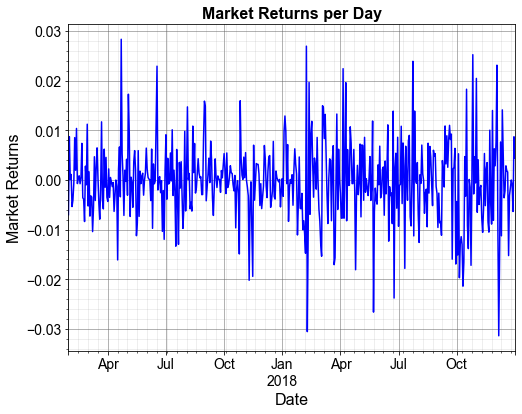

In [2]:
market_return.plot(color = 'blue')

plt.title('Market Returns per Day', fontname="arial", fontsize=16, fontweight="bold")
plt.xlabel('Date', fontname="arial", fontsize=16)
plt.ylabel('Market Returns', fontname="arial", fontsize=16)
plt.xticks(fontname="arial", fontsize=14)
plt.yticks(fontname="arial", fontsize=14)

plt.grid(which='major', linestyle='-', linewidth='0.5', color='#666666')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

fig = plt.gcf()
fig.set_size_inches(8, 6)

plt.savefig('2_4_5a1.pdf')

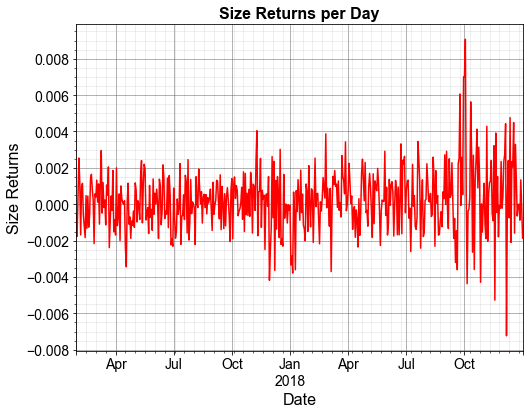

In [3]:
simp_return.plot(color = 'red')

plt.title('Size Returns per Day', fontname="arial", fontsize=16, fontweight="bold")
plt.xlabel('Date', fontname="arial", fontsize=16)
plt.ylabel('Size Returns', fontname="arial", fontsize=16)
plt.xticks(fontname="arial", fontsize=14)
plt.yticks(fontname="arial", fontsize=14)

plt.grid(which='major', linestyle='-', linewidth='0.5', color='#666666')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

fig = plt.gcf()
fig.set_size_inches(8, 6)

plt.savefig('2_4_5a2.pdf')

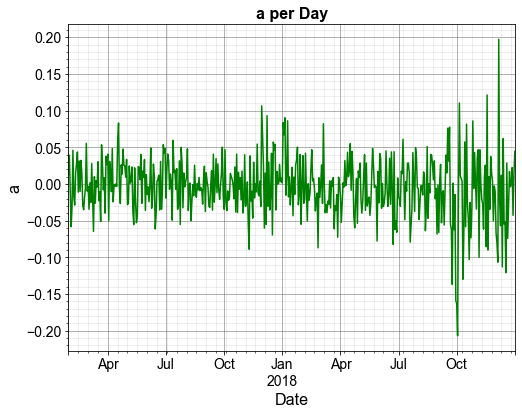

In [4]:
a.plot(color = 'green')

plt.title('a per Day', fontname="arial", fontsize=16, fontweight="bold")
plt.xlabel('Date', fontname="arial", fontsize=16)
plt.ylabel('a', fontname="arial", fontsize=16)
plt.xticks(fontname="arial", fontsize=14)
plt.yticks(fontname="arial", fontsize=14)

plt.grid(which='major', linestyle='-', linewidth='0.5', color='#666666')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.savefig('2_4_5a3.pdf')

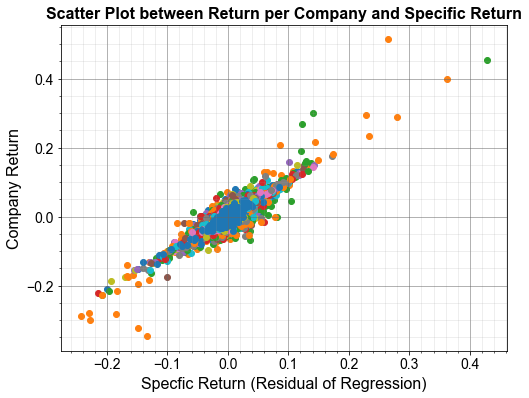

In [5]:
for company in e.columns:
    plt.scatter(e[company], ri[company])

plt.title('Scatter Plot between Return per Company and Specific Return', fontname="arial", fontsize=16, fontweight="bold")
plt.xlabel('Specfic Return (Residual of Regression)', fontname="arial", fontsize=16)
plt.ylabel('Company Return', fontname="arial", fontsize=16)
plt.xticks(fontname="arial", fontsize=14)
plt.yticks(fontname="arial", fontsize=14)

plt.grid(which='major', linestyle='-', linewidth='0.5', color='#666666')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.savefig('2_4_5c1.pdf')

In [6]:
R = pd.DataFrame(columns=['market_return', 'simp_return'])
R['market_return']=market_return
R['simp_return']=simp_return

R_covs = []
w = 3

covr = R.cov()
covr
# covr.to_csv(r'2_4_5cov.csv')


,market_return,simp_return
market_return,0.000063,-0.000003
simp_return,-0.000003,0.000003


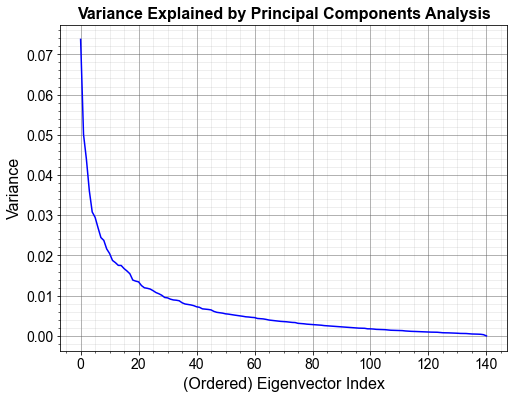

In [7]:
eigvals, eigvecs = np.linalg.eigh(e.astype(float).cov())
ser = pd.Series(eigvals[::-1]/eigvals.sum())

ser.plot(color = 'blue')

plt.title('Variance Explained by Principal Components Analysis', fontname="arial", fontsize=16, fontweight="bold")
plt.xlabel('(Ordered) Eigenvector Index', fontname="arial", fontsize=16)
plt.ylabel('Variance', fontname="arial", fontsize=16)
plt.xticks(fontname="arial", fontsize=14)
plt.yticks(fontname="arial", fontsize=14)

plt.grid(which='major', linestyle='-', linewidth='0.5', color='#666666')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.savefig('2_4_5e1.pdf')
